In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

In [3]:
def get_gene_name(df):
    return df["index"].split("|")[0]

In [4]:
allReads = pd.read_csv("../slamdunk/csv/allreads.csv", index_col=["Chromosome", "Start", "End", "Name", "Length", "Strand"])

allReads["index"] = allReads.index.get_level_values(3)
allReads["gene"] = allReads.apply(get_gene_name, axis=1)

allReads = allReads.drop(columns="index")
allReads.columns = ["DMSO-Total"] * 3 + ["TPG-Total"] * 3 + ["DMSO-P0"] * 3 + ["TPG-P0"] * 3 + ["DMSO-L10a"] * 3 + ["TPG-L10a"] * 3 + ["gene"]

allReads = allReads.filter(regex="Total|gene")
allReads = allReads[(allReads["gene"] == "CHAC1") | (allReads["gene"] == "DDIT3") | (allReads["gene"] == "HERPUD1")]

allReads["protocol"] = "all"

allReads

,,,,,,DMSO-Total,DMSO-Total,DMSO-Total,TPG-Total,TPG-Total,TPG-Total,gene,protocol
Chromosome,Start,End,Name,Length,Strand,,,,,,,,
chr12,57516593,57516808,DDIT3|ENSG00000175197.13,215,-,131,104,127,2354,2165,1904,DDIT3,all
chr15,40955775,40956512,CHAC1|ENSG00000128965.13,737,+,45,38,30,953,903,928,CHAC1,all
chr16,56943291,56944864,HERPUD1|ENSG00000051108.15,1573,+,234,302,329,5577,5213,4830,HERPUD1,all


In [5]:
tcReads = pd.read_csv("../slamdunk/csv/tcreads.csv", index_col=["Chromosome", "Start", "End", "Name", "Length", "Strand"])

tcReads["index"] = tcReads.index.get_level_values(3)
tcReads["gene"] = tcReads.apply(get_gene_name, axis=1)

tcReads = tcReads.drop(columns="index")
tcReads.columns = ["DMSO-Total"] * 3 + ["TPG-Total"] * 3 + ["DMSO-P0"] * 3 + ["TPG-P0"] * 3 + ["DMSO-L10a"] * 3 + ["TPG-L10a"] * 3 + ["gene"]

tcReads = tcReads.filter(regex="Total|gene")
tcReads = tcReads[(tcReads["gene"] == "CHAC1") | (tcReads["gene"] == "DDIT3") | (tcReads["gene"] == "HERPUD1")]

tcReads["protocol"] = "tc"

tcReads

,,,,,,DMSO-Total,DMSO-Total,DMSO-Total,TPG-Total,TPG-Total,TPG-Total,gene,protocol
Chromosome,Start,End,Name,Length,Strand,,,,,,,,
chr12,57516593,57516808,DDIT3|ENSG00000175197.13,215,-,101,74,105,1908,1802,1540,DDIT3,tc
chr15,40955775,40956512,CHAC1|ENSG00000128965.13,737,+,41,23,21,799,793,800,CHAC1,tc
chr16,56943291,56944864,HERPUD1|ENSG00000051108.15,1573,+,212,217,258,4535,4622,4053,HERPUD1,tc


In [6]:
deltaReads_mean = allReads.filter(regex="TPG").mean(axis=1) - allReads.filter(regex="DMSO").mean(axis=1)
deltaTcReads_mean = tcReads.filter(regex="TPG").mean(axis=1) - tcReads.filter(regex="DMSO").mean(axis=1)

In [7]:
deltaTcReads_mean / deltaReads_mean

Chromosome  Start     End       Name                        Length  Strand
chr12       57516593  57516808  DDIT3|ENSG00000175197.13    215     -         0.819997
chr15       40955775  40956512  CHAC1|ENSG00000128965.13    737     +         0.863721
chr16       56943291  56944864  HERPUD1|ENSG00000051108.15  1573    +         0.848729
dtype: float64

In [8]:
merged_df = pd.concat([allReads, tcReads])

In [9]:
df_melt = pd.melt(merged_df, id_vars=["gene", "protocol"])

In [10]:
df_melt

,gene,protocol,variable,value
0,DDIT3,all,DMSO-Total,131
1,CHAC1,all,DMSO-Total,45
2,HERPUD1,all,DMSO-Total,234
3,DDIT3,tc,DMSO-Total,101
4,CHAC1,tc,DMSO-Total,41
5,HERPUD1,tc,DMSO-Total,212
6,DDIT3,all,DMSO-Total,104
7,CHAC1,all,DMSO-Total,38
8,HERPUD1,all,DMSO-Total,302
9,DDIT3,tc,DMSO-Total,74


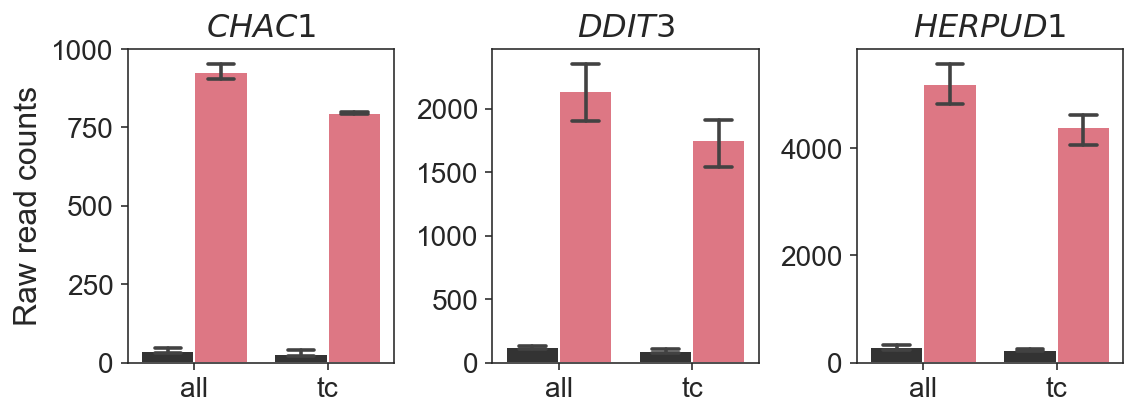

In [11]:
sns.set_style("ticks")
fig = plt.figure(figsize=(8, 3), tight_layout=True)
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

palette = {"DMSO-Total":black, "TPG-Total":red}

for ax, gene in zip((ax1, ax2, ax3), ("CHAC1", "DDIT3", "HERPUD1")):
    
    tmp = df_melt[df_melt["gene"] == gene]
    sns.barplot(x="protocol", y="value", hue="variable", palette=palette, data=tmp, ax=ax, capsize=0.2, errwidth=1.8)

    ax.tick_params(direction="out", labelsize=14)
    ax.get_legend().set_visible(False)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f"$\it{gene}$", fontsize=16)

ax1.set_ylabel("Raw read counts", fontsize=16)

fig.savefig("../results/figure_S5/BarPlot_ReadCount&TcReadCount.pdf", bbox_inches="tight", transparent=True)